<a href="https://colab.research.google.com/github/MarcosArize/Projetos-Ciencia-de-Dados/blob/main/Exemplo_B%C3%A1sico_de_Rede%20Neural_Convolucional_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo Básico de Rede Neural Convolucional (CNN)


Este notebook demonstra um exemplo simples de uma CNN (Convolutional Neural Network) usando Keras e o dataset MNIST (imagens de dígitos manuscritos).

A CNN é composta por:
- Camadas convolucionais
- Camadas de pooling (subamostragem)
- Camada densa para classificação


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


In [ ]:

# Carregar o dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizar os dados
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Ajustar forma para [amostras, altura, largura, canais]
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encoding das classes
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


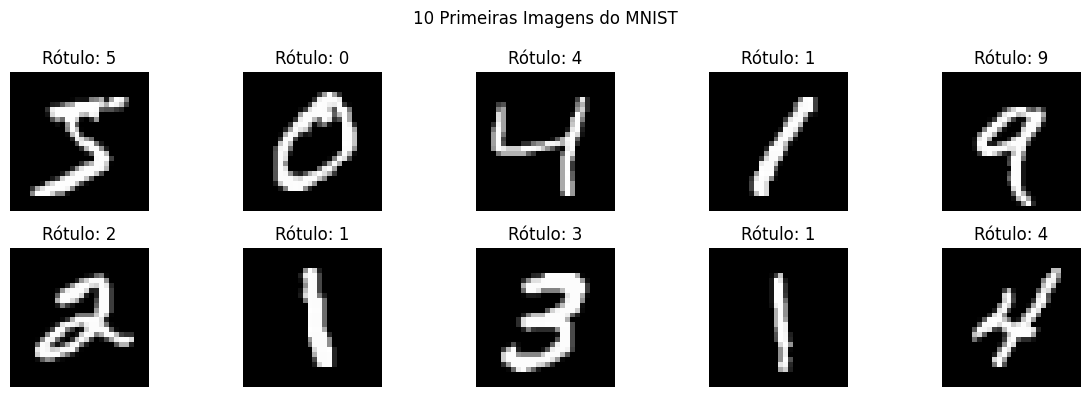

In [ ]:
import matplotlib.pyplot as plt

# Exibir as 10 primeiras imagens do conjunto de treino
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Rótulo: {y_train[i]}")
    plt.axis('off')
plt.suptitle("10 Primeiras Imagens do MNIST")
plt.tight_layout()
plt.show()

In [ ]:

# Definir o modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes de dígitos
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Treinar o modelo
history = model.fit(X_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.1)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 57s 131ms/step - accuracy: 0.8406 - loss: 0.5513 - val_accuracy: 0.9783 - val_loss: 0.0748
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 127ms/step - accuracy: 0.9793 - loss: 0.0684 - val_accuracy: 0.9862 - val_loss: 0.0476
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 125ms/step - accuracy: 0.9859 - loss: 0.0450 - val_accuracy: 0.9860 - val_loss: 0.0440
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 125ms/step - accuracy: 0.9896 - loss: 0.0343 - val_accuracy: 0.9873 - val_loss: 0.0451
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 52s 124ms/step - accuracy: 0.9907 - loss: 0.0281 - val_accuracy: 0.9897 - val_loss: 0.0365


In [ ]:

# Avaliar o modelo
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Acurácia no conjunto de teste: {test_acc:.4f}")


Acurácia no conjunto de teste: 0.9894


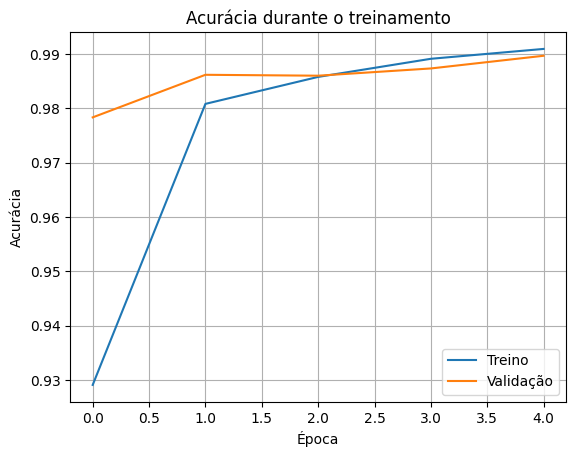

In [ ]:

plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title("Acurácia durante o treinamento")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.legend()
plt.grid(True)
plt.show()
